In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File to Load 
file_to_load = 'Data Sets/Latest Netflix data with 26+ joined attributes/netflix-rotten-tomatoes-metacritic-imdb.csv'
netflix_metacritic = pd.read_csv(file_to_load)

In [2]:
netflix_metacritic.head()
netflix_metacritic_subset = netflix_metacritic[['Title','Genre','Languages','Country Availability','Director', 'Series or Movie','IMDb Score']]
netflix_metacritic_subset.columns = ['Title','Genre','Languages','Country','Director','Series or Movie','IMDb Score']

netflix_country_split = netflix_metacritic_subset.Country.str.split(',')
series = netflix_country_split.apply(pd.Series, 1)
stacked = series.stack()
drop = stacked.index = stacked.index.droplevel(-1)
df = pd.DataFrame(stacked)
df = df.join(netflix_metacritic_subset)
del df['Country']
df.columns = ['Country','Title','Genre','Languages','Director','Media Type','IMDb Score']
df = df.reset_index(drop=True)
df.to_csv('Data Sets/G3_Netflix_by_Country_IMDb.csv', index = False)
df

,Country,Title,Genre,Languages,Director,Media Type,IMDb Score
0,Thailand,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Tomas Alfredson,Series,7.9
1,Canada,HOW TO BUILD A GIRL,Comedy,English,Coky Giedroyc,Movie,5.8
2,Canada,Centigrade,"Drama, Thriller",English,Brendan Walsh,Movie,4.3
3,Belgium,ANNE+,Drama,Turkish,NaN,Series,6.5
4,Netherlands,ANNE+,Drama,Turkish,NaN,Series,6.5
...,...,...,...,...,...,...,...
195580,Brazil,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family",English,NaN,Series,6.2
195581,Netherlands,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family",English,NaN,Series,6.2
195582,Italy,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family",English,NaN,Series,6.2
195583,Israel,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family",English,NaN,Series,6.2


In [3]:
titles_bycountry = df.groupby('Country')['Title'].count()
media_bycountry = df.groupby(['Country','Media Type'])['Title'].count()
media_bycountry = pd.DataFrame(media_bycountry)
media_bycountry = media_bycountry.reset_index()
media_bycountry

,Country,Media Type,Title
0,Argentina,Movie,3374
1,Argentina,Series,1764
2,Australia,Movie,3743
3,Australia,Series,2077
4,Belgium,Movie,3596
...,...,...,...
67,Turkey,Series,1746
68,United Kingdom,Movie,4126
69,United Kingdom,Series,2185
70,United States,Movie,3653


In [4]:
# happynetflix_merge = pd.merge(media_bycountry, world_happiness_report_sub, on='Country',how='inner')
# happynetflix_merge.columns = ['Country','Media Type','Media Count','Region','Happiness Score']
# happynetflix_merge = happynetflix_merge[['Region','Country','Happiness Score','Media Type','Media Count']]
# happynetflix_merge

In [5]:
# File to Load 
file_to_load_two = 'Data Sets/Netflix Subscribers and Revenue by Country/DataNetflixRevenue2020_V2.csv'
netflix_subscribers_country= pd.read_csv(file_to_load_two)

In [6]:
netflix_subscribers_country.head()
netflix_rev_region = netflix_subscribers_country.groupby(['Area','Years']).sum('Subscribers')
netflix_rev_region

Revenue
Area                            Years                
Asia-Pacific                    Q1 - 2018   199117000
                                Q1 - 2019   319602000
                                Q1 - 2020   483660000
                                Q2 - 2018   221252000
                                Q2 - 2019   349494000
                                Q2 - 2020   569140000
                                Q3 - 2018   248691000
                                Q3 - 2019   382304000
                                Q4 - 2018   276756000
                                Q4 - 2019   418121000
Europe,  Middle East and Africa Q1 - 2018   886649000
                                Q1 - 2019  1233379000
                                Q1 - 2020  1723474000
                                Q2 - 2018   975497000
                                Q2 - 2019  1319087000
                                Q2 - 2020  1892537000
                                Q3 - 2018  1004749000
                                Q3 - 2019  1428040000
                                Q4 - 2018  1096812000
                                Q4 - 2019  1562561000
Latin America                   Q1 - 2018   540182000
                                Q1 - 2019   630472000
                                Q1 - 2020   793453000
                                Q2 - 2018   568071000
                                Q2 - 2019   677136000
                                Q2 - 2020   785368000
                                Q3 - 2018   562307000
                                Q3 - 2019   741434000
                                Q4 - 2018   567137000
                                Q4 - 2019   746392000
United States and Canada        Q1 - 2018  1976157000
                                Q1 - 2019  2256851000
                                Q1 - 2020  2702776000
                                Q2 - 2018  2049546000
                                Q2 - 2019  2501199000
                                Q2 - 2020  2839670000
                                Q3 - 2018  2094850000
                                Q3 - 2019  2621250000
                                Q4 - 2018  2160979000
                                Q4 - 2019  2671908000

In [7]:
# File to Load 
file_to_load_three = 'Data Sets/Netflix Subscribers and Revenue by Country/DataNetflixSubscriber2020_V2.csv'
netflix_subscribers_revenue = pd.read_csv(file_to_load_three)

In [8]:
netflix_subscribers_revenue.head()

netflix_subs_region = netflix_subscribers_revenue.groupby(['Area','Years']).sum('Subscribers')
netflix_subs_region

Subscribers
Area                            Years                 
Asia-Pacific                    Q1 - 2018      7394000
                                Q1 - 2019     12141000
                                Q1 - 2020     19835000
                                Q2 - 2018      8372000
                                Q2 - 2019     12942000
                                Q2 - 2020     22492000
                                Q3 - 2018      9461000
                                Q3 - 2019     14485000
                                Q4 - 2018     10607000
                                Q4 - 2019     16233000
Europe,  Middle East and Africa Q1 - 2018     29339000
                                Q1 - 2019     42542000
                                Q1 - 2020     58734000
                                Q2 - 2018     31317000
                                Q2 - 2019     44229000
                                Q2 - 2020     61483000
                                Q3 - 2018     33836000
                                Q3 - 2019     47355000
                                Q4 - 2018     37818000
                                Q4 - 2019     51778000
Latin America                   Q1 - 2018     21260000
                                Q1 - 2019     27547000
                                Q1 - 2020     34318000
                                Q2 - 2018     22795000
                                Q2 - 2019     27890000
                                Q2 - 2020     36068000
                                Q3 - 2018     24115000
                                Q3 - 2019     29380000
                                Q4 - 2018     26077000
                                Q4 - 2019     31417000
United States and Canada        Q1 - 2018     60909000
                                Q1 - 2019     66633000
                                Q1 - 2020     69969000
                                Q2 - 2018     61870000
                                Q2 - 2019     66501000
                                Q2 - 2020     72904000
                                Q3 - 2018     63010000
                                Q3 - 2019     67114000
                                Q4 - 2018     64757000
                                Q4 - 2019     67662000

In [9]:
# File to Load 
file_to_load_four = 'Data Sets/Netflix Subscribers and Revenue by Country/NetflixsRevenue2018toQ2_2020.csv'
Netflix_revenue_country = pd.read_csv(file_to_load_four)

In [10]:
Netflix_revenue_country 

,Area,Q1 - 2018,Q2 - 2018,Q3 - 2018,Q4 - 2018,Q1 - 2019,Q2 - 2019,Q3 - 2019,Q4 - 2019,Q1 - 2020,Q2 - 2020
0,United States and Canada,1976157000,2049546000,2094850000,2160979000,2256851000,2501199000,2621250000,2671908000,2702776000,2839670000
1,"Europe, Middle East, and Africa",886649000,975497000,1004749000,1096812000,1233379000,1319087000,1428040000,1562561000,1723474000,1892537000
2,Latin America,540182000,568071000,562307000,567137000,630472000,677136000,741434000,746392000,793453000,785368000
3,Asia-Pacific,199117000,221252000,248691000,276756000,319602000,349494000,382304000,418121000,483660000,569140000


In [11]:
# File to Load 
file_to_load_five = 'Data Sets/Netflix Subscribers and Revenue by Country/NetflixSubscribersbyCountryfrom2018toQ2_2020.csv'
netflix_subscribers_country_v = pd.read_csv(file_to_load_five)

In [12]:
netflix_subscribers_country_v 

,Area,Q1 - 2018,Q2 - 2018,Q3 - 2018,Q4 - 2018,Q1 - 2019,Q2 - 2019,Q3 - 2019,Q4 - 2019,Q1 - 2020,Q2 - 2020
0,United States and Canada,60909000,61870000,63010000,64757000,66633000,66501000,67114000,67662000,69969000,72904000
1,"Europe, Middle East, and Africa",29339000,31317000,33836000,37818000,42542000,44229000,47355000,51778000,58734000,61483000
2,Latin America,21260000,22795000,24115000,26077000,27547000,27890000,29380000,31417000,34318000,36068000
3,Asia-Pacific,7394000,8372000,9461000,10607000,12141000,12942000,14485000,16233000,19835000,22492000


In [13]:
# File to Load 
file_to_load_h = 'Data Sets/World Happiness Report/world-happiness-report-2021.csv'
world_happiness_report= pd.read_csv(file_to_load_h)

In [14]:
world_happiness_report

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [15]:
# File to Load 
file_to_load_r = 'Data Sets/World Happiness Report/world-happiness-report.csv'
world_happiness_report_t= pd.read_csv(file_to_load_r)

In [16]:
world_happiness_report_t.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [86]:
#File to Load
file_to_load = 'Data Sets/G3_Netflix_by_Country_IMDb.csv'
netflix_IMDb = pd.read_csv(file_to_load)
netflix_IMDb.head()

,Country,Title,Genre,Languages,Director,Media Type,IMDb Score
0,Thailand,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Tomas Alfredson,Series,7.9
1,Canada,HOW TO BUILD A GIRL,Comedy,English,Coky Giedroyc,Movie,5.8
2,Canada,Centigrade,"Drama, Thriller",English,Brendan Walsh,Movie,4.3
3,Belgium,ANNE+,Drama,Turkish,NaN,Series,6.5
4,Netherlands,ANNE+,Drama,Turkish,NaN,Series,6.5


In [18]:
IMDb_bycountry = df.groupby('Country')['IMDb Score'].mean()
IMDb_bycountry = pd.DataFrame(IMDb_bycountry)
IMDb_bycountry = IMDb_bycountry.reset_index()
IMDb_bycountry.columns = ['Country', 'Average IMDb Score']
IMDb_bycountry.head()

,Country,Average IMDb Score
0,Argentina,6.562972
1,Australia,6.570967
2,Belgium,6.585095
3,Brazil,6.553182
4,Canada,6.552189


In [19]:
IMDb_bycountry.describe()

,Average IMDb Score
count,36.000000
mean,6.587701
std,0.029409
min,6.543348
25%,6.566250
50%,6.584400
75%,6.601170
max,6.675830


In [20]:
happycountry = world_happiness_report[['Country name', 'Ladder score']]
happycountry.columns = ['Country','Ladder score']
happycountry.head()

,Country,Ladder score
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464


In [21]:
len(happycountry)

149

In [100]:
happyIMDb_merge = pd.merge(happycountry, IMDb_bycountry, on='Country',how='inner')
happyIMDb_merge = pd.DataFrame(happyIMDb_merge)
happyIMDb_merge

,Country,Ladder score,Average IMDb Score
0,Switzerland,7.571,6.593347
1,Iceland,7.554,6.574310
2,Netherlands,7.464,6.587577
3,Sweden,7.363,6.587994
4,Australia,7.183,6.570967
5,Israel,7.157,6.596137
6,Germany,7.155,6.584393
7,Canada,7.103,6.552189
8,United Kingdom,7.064,6.557044
9,Czech Republic,6.965,6.559986


In [98]:
len(happyIMDb_merge)

35

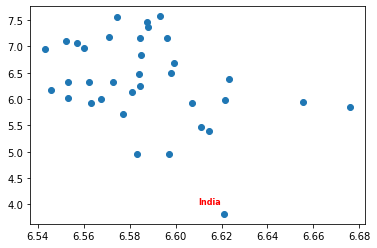

In [123]:
y_values = happyIMDb_merge['Ladder score']
x_values = happyIMDb_merge['Average IMDb Score']
plt.scatter(x_values,y_values)
plt.annotate(f'India',(6.61, 4.0), fontsize = 8 , color = 'Red',fontweight = 'bold')
plt.show()

In [87]:
animation = netflix_IMDb['Genre'].str.contains('Animation') == True

netflix_IMDb.loc[animation].groupby(['Country']).count()


,Title,Genre,Languages,Director,Media Type,IMDb Score
Country,,,,,,
Argentina,591,591,553,199,591,569
Australia,607,607,566,230,607,586
Belgium,639,639,601,219,639,616
Brazil,575,575,538,194,575,557
Canada,617,617,578,221,617,603
Colombia,575,575,537,195,575,564
Czech Republic,568,568,531,201,568,546
France,652,652,616,228,652,631
Germany,593,593,555,202,593,574


In [64]:
netflix_genre_split = netflix_IMDb.Genre.str.split(',')
series = netflix_genre_split.apply(pd.Series, 1)
stacked = series.stack()
drop = stacked.index = stacked.index.droplevel(-1)
g_df = pd.DataFrame(stacked)
g_df = g_df.join(netflix_IMDb)
del g_df['Genre']
g_df = df.reset_index(drop=True)
g_df.head()

,Country,Title,Genre,Languages,Director,Media Type,IMDb Score
0,Thailand,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Tomas Alfredson,Series,7.9
1,Canada,HOW TO BUILD A GIRL,Comedy,English,Coky Giedroyc,Movie,5.8
2,Canada,Centigrade,"Drama, Thriller",English,Brendan Walsh,Movie,4.3
3,Belgium,ANNE+,Drama,Turkish,NaN,Series,6.5
4,Netherlands,ANNE+,Drama,Turkish,NaN,Series,6.5


In [24]:
g_df.columns = ['Genre','Country','Title','Languages','Director', 'Media Type','IMDb Score']
g_df.head()

,Genre,Country,Title,Languages,Director,Media Type,IMDb Score
0,Thailand,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Tomas Alfredson,Series,7.9
1,Canada,HOW TO BUILD A GIRL,Comedy,English,Coky Giedroyc,Movie,5.8
2,Canada,Centigrade,"Drama, Thriller",English,Brendan Walsh,Movie,4.3
3,Belgium,ANNE+,Drama,Turkish,NaN,Series,6.5
4,Netherlands,ANNE+,Drama,Turkish,NaN,Series,6.5


In [25]:
netflix_genre = g_df[['Country','Title','Genre','Languages','IMDb Score']]
netflix_genre.head()

,Country,Title,Genre,Languages,IMDb Score
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance",Thailand,"Swedish, Spanish",7.9
1,HOW TO BUILD A GIRL,Comedy,Canada,English,5.8
2,Centigrade,"Drama, Thriller",Canada,English,4.3
3,ANNE+,Drama,Belgium,Turkish,6.5
4,ANNE+,Drama,Netherlands,Turkish,6.5
